<a href="https://colab.research.google.com/github/sshresth09/FeynnProject2/blob/main/Feynn_Uber_drive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import os
import warnings
from sklearn.preprocessing import StandardScaler
data = pd.read_csv("Uber Drives.csv")

In [4]:
dim = data.shape
dim

(1155, 7)

In [5]:
data["CATEGORY*"].fillna("Others", inplace = True)
data["PURPOSE*"].fillna("Others", inplace = True)
data=data.drop(columns=['START_DATE*','END_DATE*','START*','STOP*','CATEGORY*'])
data["PURPOSE*"]=data["PURPOSE*"].map({'Meal/Entertain':0,'Errand/Supplies':1,'Others':2,'Meeting':3,'Temporary Site':4,'Customer Visit':5,'Airport/Travel':6,'Between Offices':7,'Moving':8,'Charity ($)':9,'Commute':10})
data.head()

,MILES*,PURPOSE*
0,5.1,0
1,5.0,2
2,4.8,1
3,4.7,3
4,63.7,5


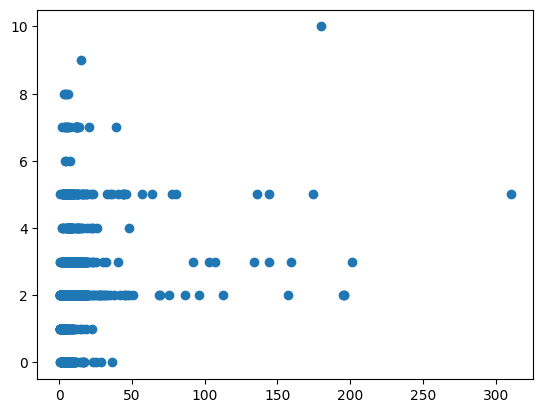

In [7]:
plt.scatter(data["MILES*"],data["PURPOSE*"])
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

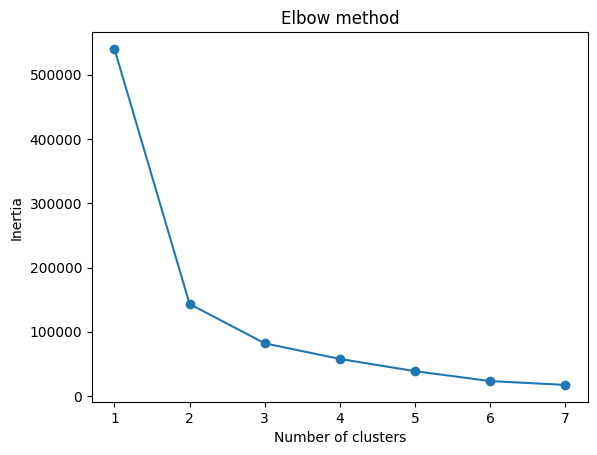

In [9]:
fill = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    fill.append(kmeans.inertia_)

plt.plot(range(1,8), fill, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='MILES*', ylabel='PURPOSE*'>

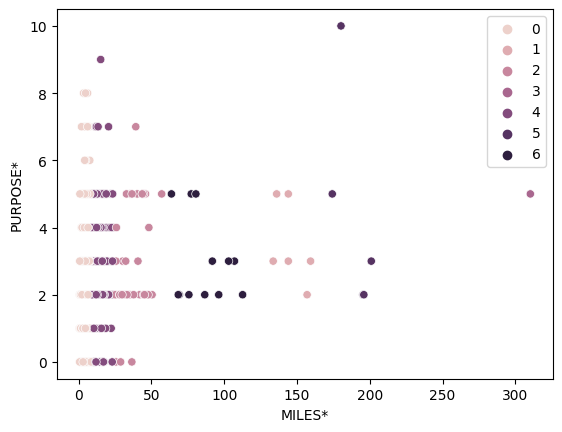

In [11]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(data)
sns.scatterplot(data=data, x="MILES*", y="PURPOSE*",hue=kmeans.labels_ )

In [12]:
clusterCount = np.bincount(kmeans.labels_)
clusterCount

array([752,   6,  40,   1, 338,   6,  12])